## Comparison of Different ML algorithms on Cervical Cancer Dataset

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
url = 'cervical_cancer.csv'
cancer_df = pd.read_csv(url)

In [3]:
# Data preprocessing
# Replace missing values represented as '?' with NaN
cancer_df.replace('?', np.nan, inplace=True)

In [4]:
# Convert all columns to numeric
cancer_df = cancer_df.apply(pd.to_numeric)

In [5]:
# Drop columns with a significant number of missing values
cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace=True)

In [6]:
# Fill remaining missing values with column mean
cancer_df.fillna(cancer_df.mean(), inplace=True)

In [7]:
# Splitting the dataset into features and target variable
input_df = cancer_df.drop(columns=['Biopsy'])
target_df = cancer_df['Biopsy']

In [8]:
# Standardize the data
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_df)

In [9]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
input_pca = pca.fit_transform(input_scaled)

In [10]:
# Split the data into training (80%), validation (10%), and test sets (10%)
x_train, x_test, y_train, y_test = train_test_split(input_pca, target_df, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [11]:
# Function to train and evaluate a model
def train_and_evaluate(model, x_train, y_train, x_val, y_val, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Evaluate the model
    train_accuracy = model.score(x_train, y_train)
    val_accuracy = model.score(x_val, y_val)
    test_accuracy = model.score(x_test, y_test)

    print(f'Training accuracy: {train_accuracy}')
    print(f'Validation accuracy: {val_accuracy}')
    print(f'Test accuracy: {test_accuracy}\n')

    # Predictions and evaluation
    y_predict = model.predict(x_test)
    print(classification_report(y_test, y_predict))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 1. Random Forest Classifier:

- Ensemble Learning: Random Forest is an ensemble of decision trees. Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

- Bootstrap Aggregating (Bagging): Random Forest uses bagging. It generates multiple subsets of the training data by sampling with replacement (bootstrap samples). Each subset is used to train a decision tree.

- Random Feature Selection: During the construction of each tree, Random Forest selects a random subset of features for each split, ensuring diversity among the trees.

- Aggregation: For classification, the forest predicts the class that is the mode of the classes predicted by individual trees. For regression, it predicts the mean of the outputs of individual trees.

Random Forest Classifier
Training accuracy: 1.0
Validation accuracy: 0.9534883720930233
Test accuracy: 0.9651162790697675

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.57      0.73         7

    accuracy                           0.97        86
   macro avg       0.98      0.79      0.85        86
weighted avg       0.97      0.97      0.96        86



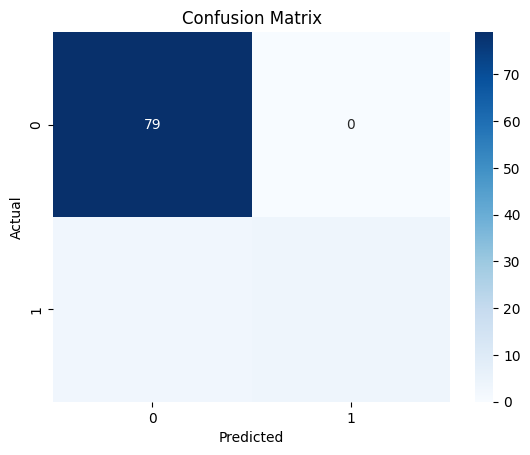

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 2. Support Vector Machine (SVM)

- Hyperplane: SVM finds the hyperplane that best separates the classes. A hyperplane in an N-dimensional space (N - the number of features) is a flat affine subspace of dimension N-1.

- Maximal Margin: SVM chooses the hyperplane with the maximum margin, i.e., the maximum distance between the hyperplane and the nearest points (support vectors) from either class.

- Kernel Trick: For non-linearly separable data, SVM uses kernel functions to transform the input space into a higher-dimensional space where a linear separator can be found. Common kernels include linear, polynomial, and radial basis function (RBF).

Support Vector Machine Classifier
Training accuracy: 0.9664723032069971
Validation accuracy: 0.9418604651162791
Test accuracy: 0.9651162790697675

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        79
           1       0.83      0.71      0.77         7

    accuracy                           0.97        86
   macro avg       0.90      0.85      0.88        86
weighted avg       0.96      0.97      0.96        86



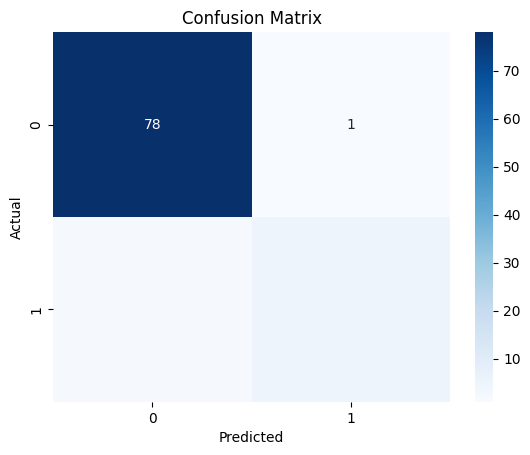

In [13]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
print("Support Vector Machine Classifier")
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
train_and_evaluate(svm_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 3. Logistic Regression

- Logistic Function: Logistic Regression models the probability that a given input belongs to a particular class. It uses the logistic function, which outputs a value between 0 and 1.
- Linear Decision Boundary: It assumes a linear relationship between the input features and the log-odds of the outcome.
- Maximum Likelihood Estimation (MLE): Logistic Regression estimates the coefficients by maximizing the likelihood function, ensuring the predicted probabilities match the observed class labels as closely as possible.

Logistic Regression Classifier
Training accuracy: 0.9664723032069971
Validation accuracy: 0.9651162790697675
Test accuracy: 0.9534883720930233

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        79
           1       0.71      0.71      0.71         7

    accuracy                           0.95        86
   macro avg       0.84      0.84      0.84        86
weighted avg       0.95      0.95      0.95        86



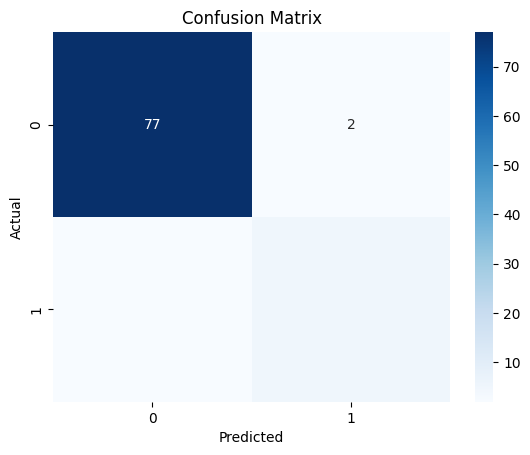

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
print("Logistic Regression Classifier")
lr_model = LogisticRegression(random_state=42)
train_and_evaluate(lr_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 4. k-Nearest Neighbors (k-NN)

- Instance-Based Learning: k-NN is a type of instance-based learning where the function is only approximated locally, and all computation is deferred until function evaluation.
- Majority Voting: For classification, k-NN classifies a new sample based on the majority class among its k nearest neighbors in the training set. For regression, it predicts the average of the values of its k nearest neighbors.
- Distance Metrics: Common distance metrics include Euclidean, Manhattan, and Minkowski distances. The choice of distance metric can affect the performance of k-NN.

k-Nearest Neighbors Classifier
Training accuracy: 0.9591836734693877
Validation accuracy: 0.9651162790697675
Test accuracy: 0.9534883720930233

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.80      0.57      0.67         7

    accuracy                           0.95        86
   macro avg       0.88      0.78      0.82        86
weighted avg       0.95      0.95      0.95        86



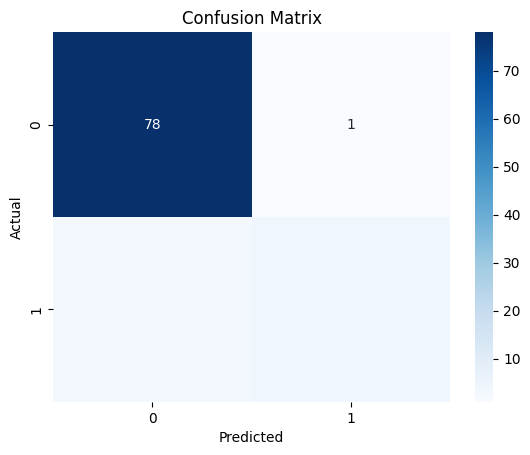

In [15]:
# k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
print("k-Nearest Neighbors Classifier")
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 5. Gradient Boosting

- Sequential Ensemble Method: Gradient Boosting builds an ensemble of trees sequentially, where each new tree corrects the errors of the previous ensemble.
- Gradient Descent: It uses gradient descent to minimize a loss function. The loss function quantifies how well the model's predictions match the actual data.
- Additive Model: Each tree in the ensemble is trained to fit the residual errors (differences between actual and predicted values) of the combined output of all previous trees.

Gradient Boosting Classifier
Training accuracy: 1.0
Validation accuracy: 0.9651162790697675
Test accuracy: 0.9651162790697675

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.57      0.73         7

    accuracy                           0.97        86
   macro avg       0.98      0.79      0.85        86
weighted avg       0.97      0.97      0.96        86



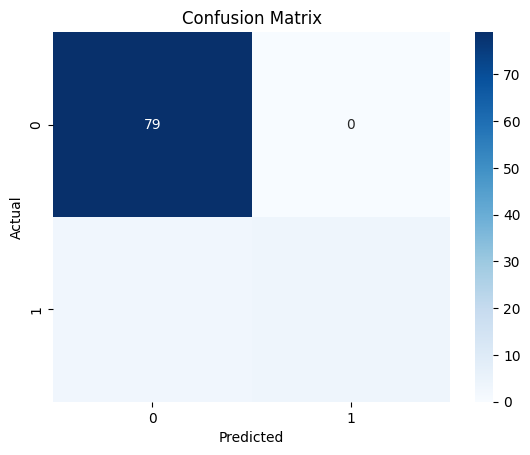

In [16]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
print("Gradient Boosting Classifier")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
train_and_evaluate(gb_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 6. Neural Networks (MLP)

- Layers of Neurons: Neural Networks consist of layers of neurons. Each neuron applies a linear transformation to the input and then applies a non-linear activation function.
- Forward Propagation: During forward propagation, input data passes through the network, layer by layer, and predictions are made.
- Backpropagation: During training, backpropagation is used to adjust the weights of the network to minimize the loss function by computing the gradient of the loss with respect to each weight.

Neural Networks Classifier


C:\Users\91948\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy: 0.9912536443148688
Validation accuracy: 0.9302325581395349
Test accuracy: 0.9418604651162791

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.67      0.57      0.62         7

    accuracy                           0.94        86
   macro avg       0.81      0.77      0.79        86
weighted avg       0.94      0.94      0.94        86



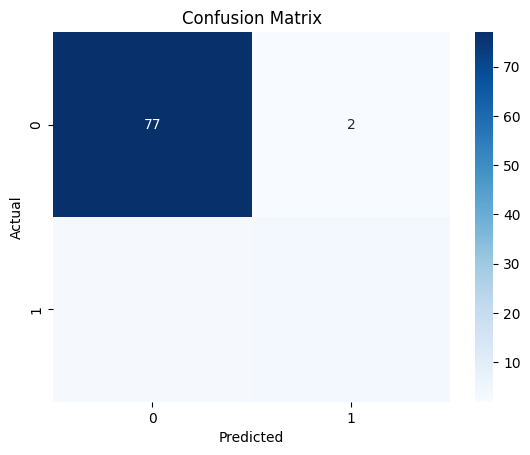

In [17]:
# Neural Networks
from sklearn.neural_network import MLPClassifier
print("Neural Networks Classifier")
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
train_and_evaluate(nn_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 7. Decision Trees

- Recursive Partitioning: Decision Trees split the data recursively based on the feature that provides the best split according to a criterion like Gini impurity or entropy.
- Leaf Nodes: Each leaf node represents a class label (in classification) or a continuous value (in regression). The path from root to leaf represents the decision rules.

Decision Tree Classifier
Training accuracy: 1.0
Validation accuracy: 0.8953488372093024
Test accuracy: 0.9534883720930233

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.80      0.57      0.67         7

    accuracy                           0.95        86
   macro avg       0.88      0.78      0.82        86
weighted avg       0.95      0.95      0.95        86



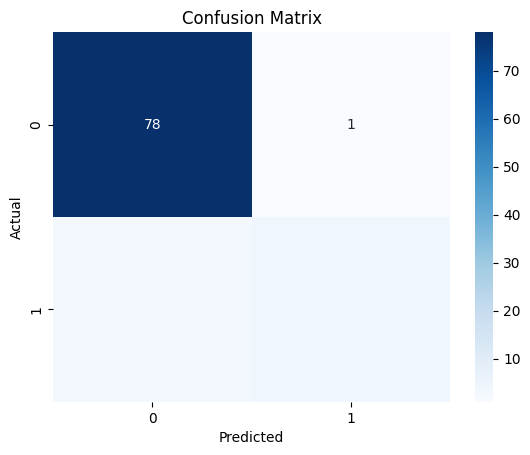

In [18]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 8. AdaBoost (Adaptive Boosting)

- Boosting: AdaBoost combines the predictions of multiple weak learners (usually decision stumps) to form a strong learner.
- Weighting: It assigns weights to each training instance. Initially, all weights are equal. In subsequent rounds, incorrectly classified instances are given higher weights.
- Final Prediction: The final prediction is a weighted sum of the predictions of all weak learners.

AdaBoost Classifier
Training accuracy: 1.0
Validation accuracy: 0.9302325581395349
Test accuracy: 0.9418604651162791

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.75      0.43      0.55         7

    accuracy                           0.94        86
   macro avg       0.85      0.71      0.76        86
weighted avg       0.93      0.94      0.93        86



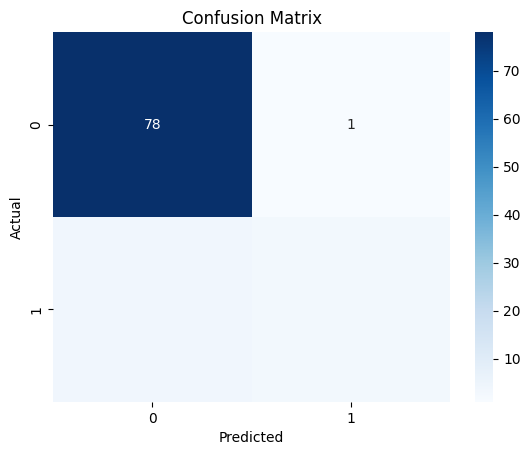

In [19]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
print("AdaBoost Classifier")
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
train_and_evaluate(ab_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 9. Bagging Classifier (Bootstrap Aggregating)

- Bootstrap Sampling: Bagging creates multiple subsets of the original dataset by sampling with replacement.
- Parallel Training: It trains a base model (e.g., decision trees) on each subset independently and in parallel.
- Aggregation: For classification, bagging predicts the class that gets the most votes across all models. For regression, it predicts the average of the outputs of all models.

Bagging Classifier
Training accuracy: 1.0
Validation accuracy: 0.9651162790697675
Test accuracy: 0.9534883720930233

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.80      0.57      0.67         7

    accuracy                           0.95        86
   macro avg       0.88      0.78      0.82        86
weighted avg       0.95      0.95      0.95        86



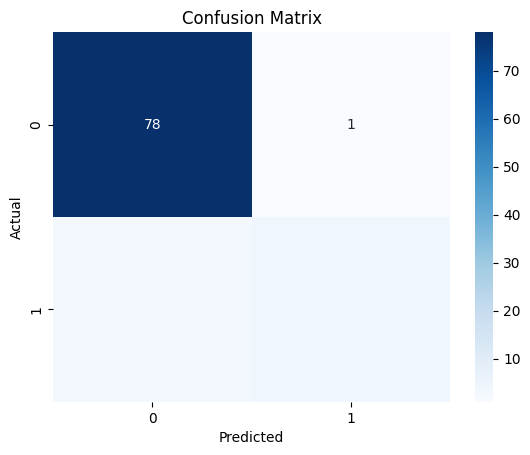

In [20]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
print("Bagging Classifier")
bc_model = BaggingClassifier(n_estimators=100, random_state=42)
train_and_evaluate(bc_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 10. Naive Bayes

- Bayes' Theorem: Naive Bayes applies Bayes' theorem with strong (naive) independence assumptions between features.
- Probability Model: It calculates the probability of each class given the input features and classifies the instance into the class with the highest posterior probability.
- Types: There are different types of Naive Bayes classifiers based on the distribution of features, such as Gaussian, Multinomial, and Bernoulli.

Naive Bayes Classifier
Training accuracy: 0.8979591836734694
Validation accuracy: 0.8837209302325582
Test accuracy: 0.9186046511627907

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.50      0.71      0.59         7

    accuracy                           0.92        86
   macro avg       0.74      0.83      0.77        86
weighted avg       0.94      0.92      0.92        86



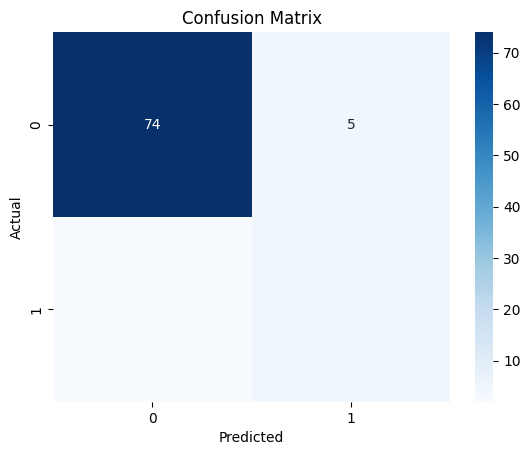

In [21]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
print("Naive Bayes Classifier")
nb_model = GaussianNB()
train_and_evaluate(nb_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 11. Extra Trees Classifier (Extremely Randomized Trees)

- Randomness: Extra Trees introduce more randomness compared to Random Forest. They use the entire training dataset and randomly select cut points for splitting the nodes.
- Ensemble Learning: Similar to Random Forest, Extra Trees aggregate the results from multiple decision trees to make the final prediction.

Extra Trees Classifier
Training accuracy: 1.0
Validation accuracy: 0.9418604651162791
Test accuracy: 0.9651162790697675

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.57      0.73         7

    accuracy                           0.97        86
   macro avg       0.98      0.79      0.85        86
weighted avg       0.97      0.97      0.96        86



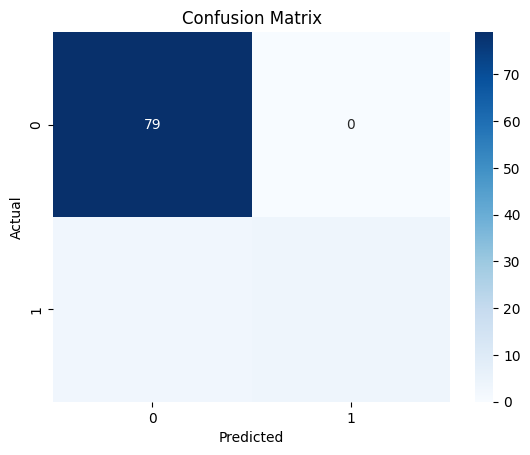

In [22]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
print("Extra Trees Classifier")
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
train_and_evaluate(et_model, x_train, y_train, x_val, y_val, x_test, y_test)

### 12. XGBoost (Extreme Gradient Boosting)

- Boosting: XGBoost is an implementation of gradient boosting which builds an ensemble of trees sequentially. Each new tree corrects the errors made by the previous ones.
- Gradient Descent: It uses gradient descent to minimize a loss function. The loss function measures how well the model's predictions match the actual data.
- Regularization: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting, making it robust and improving generalization.
- Parallel Processing: It supports parallel processing, making it faster than traditional gradient boosting implementations.
- Handling Missing Values: XGBoost can handle missing values internally.

XGBoost Classifier
Training accuracy: 1.0
Validation accuracy: 0.9418604651162791
Test accuracy: 0.9651162790697675

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.57      0.73         7

    accuracy                           0.97        86
   macro avg       0.98      0.79      0.85        86
weighted avg       0.97      0.97      0.96        86



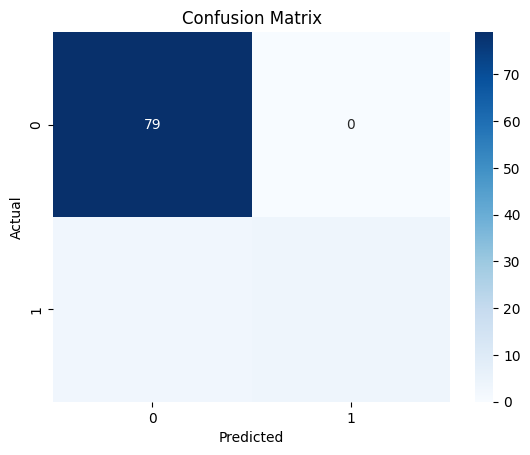

In [23]:
# XG Boost Classifier
import xgboost as xgb
print("XGBoost Classifier")
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10)
train_and_evaluate(et_model, x_train, y_train, x_val, y_val, x_test, y_test)